<a href="https://colab.research.google.com/github/Gonzalo-Ortega/Stereotypical-Behavior-Classification/blob/main/DeepLabCut_Gonzalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial configuration**
---

### Conect GPU

Enabling and testing the GPU
First, you'll need to enable GPUs for the notebook:

Navigate to Edit → Notebook Settings
select GPU from the Hardware Accelerator drop-down.

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
%tensorflow_version 2.2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


**Everything before creating your training dataset should be done in your PC! COLAB does not allow you to label the frames or do any type of image processing.**

### Import DeepLabCut

In [ ]:
# Clone the entire deeplabcut repo so we can use the demo data:
!git clone -l -s https://github.com/DeepLabCut/DeepLabCut.git cloned-DLC-repo
%cd cloned-DLC-repo
!ls

In [ ]:
# Install the latest DeepLabCut version (this will take a few minutes to install all the dependencies!)
%cd /content/cloned-DLC-repo/
!pip install '.[tf]'

In [ ]:
import deeplabcut

### Import other libraries and Google Drive
Usefull python libraries:

- Matplotlib: Plotting and data visualization.
- Pandas: Data management. Is most commonly used for data wrangling and data manipulation purposes.
- NumPy: Used to create arrays or matrices that can be applied to DL or ML models.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import os
import fnmatch
import cv2


In [ ]:
# Mount your Google Drive so the colab its allow to get data from there.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Setup proyect variables

In [ ]:
start_frame = 200
frame_rate = 20

In [ ]:
ProjectFolderName = 'TestGonzalo/test-Gonzalo-2024-01-31'
VideoType = 'avi'

# List of videos or folder to analyze:
videofile_path = '/content/gdrive/MyDrive/TestGonzalo/test-Gonzalo-2024-01-31/videos'

In [ ]:
# Path variable that links to your google drive copy:
path_config_file = '/content/gdrive/MyDrive/TestGonzalo/test-Gonzalo-2024-01-31/config.yaml'

# Training
---

There are many parameters that can help training your network, look at them carefully. Try to understand what gives you what and play with them.

In [ ]:
# Note: if you are using the demo data (i.e. examples/Reaching-Mackenzie-2018-08-30/), first delete the folder called dlc-models!
#Then, run this cell. There are many more functions you can set here, including which netowkr to use!
#check the docstring for full options you can do!
deeplabcut.create_training_dataset(path_config_file, net_type='resnet_50', augmenter_type='imgaug')

In [ ]:
deeplabcut.train_network(path_config_file, shuffle=1, trainingsetindex=0, max_snapshots_to_keep=5, displayiters=10, saveiters=250, maxiters=1000, allow_growth=False, autotune=False, keepdeconvweights=True)

EVALUATION: You know that an error of 2 pxls is more than acceptable, don't obsess too much about this, as in the 'loss' term of the training, a 'good' error is very subjective to your data.

ANALYSIS: Once you are happy with your error. Analyze your videos and then the real thing starts!! Be aware that CSV files are much easier to read than HDF5, so try to set **save_as_csv=True** and save you some trouble!

In [ ]:
deeplabcut.evaluate_network(path_config_file)

In [ ]:
deeplabcut.analyze_videos(path_config_file, ['/content/gdrive/MyDrive/TestGonzalo/test-Gonzalo-2024-01-31/videos/Mouse4089_2020-09-12_12-35-53_beh-CROP.avi'], videotype='.avi', shuffle=1, trainingsetindex=0, save_as_csv=True, destfolder=None, batchsize=None, cropping=None, TFGPUinference=True, robust_nframes=False, allow_growth=True, use_shelve=False, auto_track=True, n_tracks=None, calibrate=False, identity_only=False, use_openvino=None)

It is always nice to see the final result! So use this last line of code to create a video an look at the bodyparts dots.

In [ ]:
deeplabcut.create_labeled_video(path_config_file, ['/content/gdrive/MyDrive/TestGonzalo/test-Gonzalo-2024-01-31/videos/Mouse4089_2020-09-12_12-35-53_beh-CROP.avi'], videotype='.avi', draw_skeleton=True)

# Test analysis

---



We start by reading the .csv data file with panda.



In [ ]:
csv_file_path = '/content/gdrive/MyDrive/SBC-Gonzalo/test-Gonzalo-2024-01-31/videos/Mouse4089_2020-09-12_12-35-53_beh-CROPDLC_resnet50_test2Jan31shuffle1_1000.csv.py'
pd.set_option('display.max_columns', 25)

data = pd.read_csv(csv_file_path, header = [1,2])
data.columns = list(data.columns.get_level_values(0)
                    + data.columns.get_level_values(1))
data['nosey'] = -data['nosey']
data['lefteary'] = -data['lefteary']
data['righteary'] = -data['righteary']
data['tailbasey'] = -data['tailbasey']

data

,bodypartscoords,nosex,nosey,noselikelihood,leftearx,lefteary,leftearlikelihood,rightearx,righteary,rightearlikelihood,tailbasex,tailbasey,tailbaselikelihood
0,0,188.359619,-162.139664,0.583664,193.199356,-161.716171,0.645357,207.538666,-163.526138,0.835253,224.756256,-182.265137,0.838431
1,1,167.012009,-54.417149,0.450149,171.169144,-65.555733,0.591849,174.225296,-47.762501,0.669895,206.304230,-70.208618,0.812052
2,2,167.204666,-54.429623,0.458724,171.716034,-65.814964,0.599467,174.745682,-48.217674,0.671654,206.498932,-68.663765,0.806171
3,3,167.854431,-54.557251,0.424334,171.946518,-66.081879,0.645759,174.888306,-48.293522,0.641056,206.186890,-71.133408,0.819126
4,4,160.721466,-66.781967,0.468899,172.168793,-65.957581,0.634085,176.094467,-49.338749,0.621469,206.845383,-70.048546,0.854399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,6276,150.704773,-69.422165,0.624349,136.237030,-76.031113,0.611090,153.913116,-78.647369,0.717826,151.259811,-103.997528,0.654442
6277,6277,150.877350,-69.757614,0.647144,136.699173,-76.110054,0.611457,154.117279,-78.967903,0.713933,151.517975,-104.526321,0.652367
6278,6278,150.773407,-69.868233,0.652538,137.137253,-76.352287,0.618232,154.145782,-79.150131,0.707407,151.689941,-104.334145,0.657355
6279,6279,151.055069,-69.881226,0.643930,137.317886,-76.165604,0.611465,153.828064,-79.134026,0.691718,151.674866,-103.974609,0.688121


## Trayectory
To picture the mouse's nose trayectory we first filter the data by its likelihood.

### Check likelihood

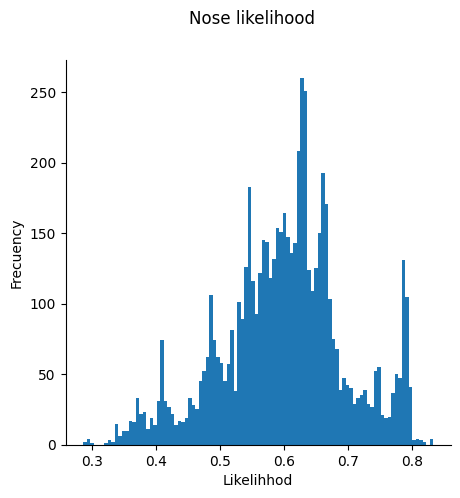

In [ ]:
# Nose likelihhod Figure #
fig = plt.figure(figsize=(5, 5))
fig.suptitle('Nose likelihood')

ax1 = fig.add_subplot(111)
ax1.hist(data['noselikelihood'], bins=100)
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('Likelihhod')
ax1.set_ylabel('Frecuency')

fig.show()

### Filter by lilekihood

In [ ]:
filtered_data = data.copy()
mask = filtered_data['noselikelihood'] < 0.55
filtered_data.loc[mask, ['nosex', 'nosey']] = np.nan

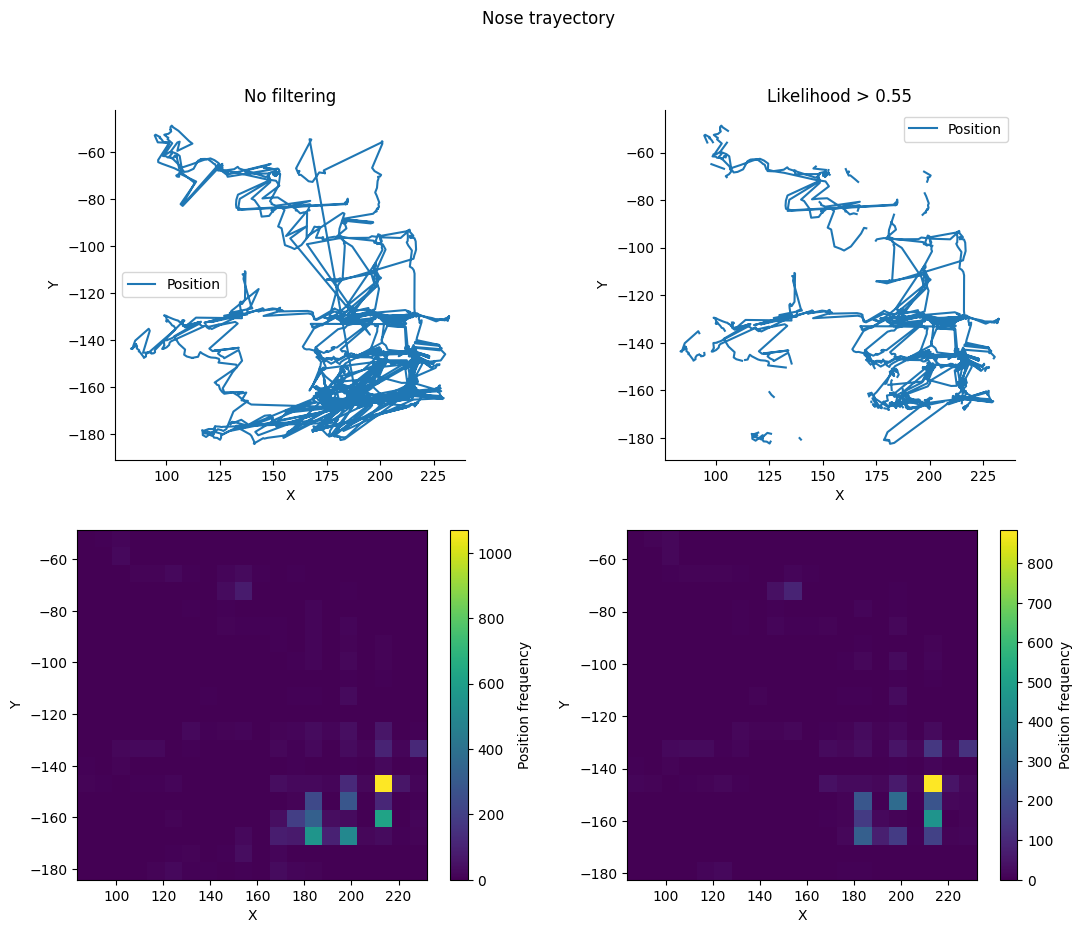

In [ ]:
# Nose trayectory Figure #

fig = plt.figure(figsize=(13, 10))
fig.suptitle('Nose trayectory')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# Plot 1: No filtering
ax1.plot(data['nosex'], data['nosey'], label='Position')
ax1.title.set_text('No filtering')
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot 2: Likelihood > 0.55
ax2.plot(filtered_data['nosex'], filtered_data['nosey'], label='Position')
ax2.title.set_text('Likelihood > 0.55')
ax2.set_box_aspect(1)
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

# Plot 3: Heatmap - No filtering
hist = ax3.hist2d(data['nosex'], data['nosey'], bins=20)
cbar = fig.colorbar(hist[3], ax=ax3)
cbar.set_label('Position frequency')
ax3.set_box_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

# Plot 4: Heatmap - Likelihood > 0.55
non_nan = ~np.isnan(filtered_data['nosex']) & ~np.isnan(filtered_data['nosey'])
hist = ax4.hist2d(filtered_data['nosex'][non_nan], filtered_data['nosey'][non_nan], bins=20)
cbar = fig.colorbar(hist[3], ax=ax4)
cbar.set_label('Position frequency')
ax4.set_box_aspect(1)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')

fig.show()

To reduce NaN data will compute the mean of the three points that form the mouse's head: the nose, the left ear and the right ear. As before, we first filter the raw data by its likelihood.

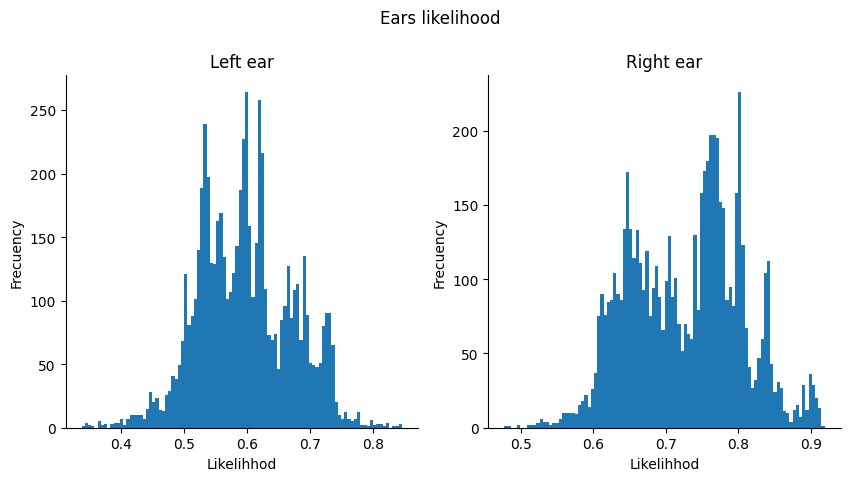

In [ ]:
# Ears likelihood Figure #

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Ears likelihood')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(data['leftearlikelihood'], bins=100)
ax1.title.set_text('Left ear')
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('Likelihhod')
ax1.set_ylabel('Frecuency')

ax2.hist(data['rightearlikelihood'], bins=100)
ax2.title.set_text('Right ear')
ax2.set_box_aspect(1)
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_xlabel('Likelihhod')
ax2.set_ylabel('Frecuency')

fig.show()

In [ ]:
mask = filtered_data['leftearlikelihood'] < 0.6
filtered_data.loc[mask, ['leftearx', 'lefteary']] = np.nan

mask = filtered_data['rightearlikelihood'] < 0.7
filtered_data.loc[mask, ['rightearx', 'righteary']] = np.nan

filtered_data

,bodypartscoords,nosex,nosey,noselikelihood,leftearx,lefteary,leftearlikelihood,rightearx,righteary,rightearlikelihood,tailbasex,tailbasey,tailbaselikelihood
0,0,188.359619,-162.139664,0.583664,193.199356,-161.716171,0.645357,207.538666,-163.526138,0.835253,224.756256,-182.265137,0.838431
1,1,NaN,NaN,0.450149,NaN,NaN,0.591849,NaN,NaN,0.669895,206.304230,-70.208618,0.812052
2,2,NaN,NaN,0.458724,NaN,NaN,0.599467,NaN,NaN,0.671654,206.498932,-68.663765,0.806171
3,3,NaN,NaN,0.424334,171.946518,-66.081879,0.645759,NaN,NaN,0.641056,206.186890,-71.133408,0.819126
4,4,NaN,NaN,0.468899,172.168793,-65.957581,0.634085,NaN,NaN,0.621469,206.845383,-70.048546,0.854399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,6276,150.704773,-69.422165,0.624349,136.237030,-76.031113,0.611090,153.913116,-78.647369,0.717826,151.259811,-103.997528,0.654442
6277,6277,150.877350,-69.757614,0.647144,136.699173,-76.110054,0.611457,154.117279,-78.967903,0.713933,151.517975,-104.526321,0.652367
6278,6278,150.773407,-69.868233,0.652538,137.137253,-76.352287,0.618232,154.145782,-79.150131,0.707407,151.689941,-104.334145,0.657355
6279,6279,151.055069,-69.881226,0.643930,137.317886,-76.165604,0.611465,NaN,NaN,0.691718,151.674866,-103.974609,0.688121


### Compute head points meaan

In [ ]:
x_coords = np.array([filtered_data['nosex'], filtered_data['leftearx'], filtered_data['rightearx']])
y_coords = np.array([filtered_data['nosey'], filtered_data['lefteary'], filtered_data['righteary']])

x_means = np.nanmean(x_coords, axis=0)
y_means = np.nanmean(y_coords, axis=0)

<ipython-input-75-61bc106af134>:4: RuntimeWarning: Mean of empty slice
  x_means = np.nanmean(x_coords, axis=0)
<ipython-input-75-61bc106af134>:5: RuntimeWarning: Mean of empty slice
  y_means = np.nanmean(y_coords, axis=0)


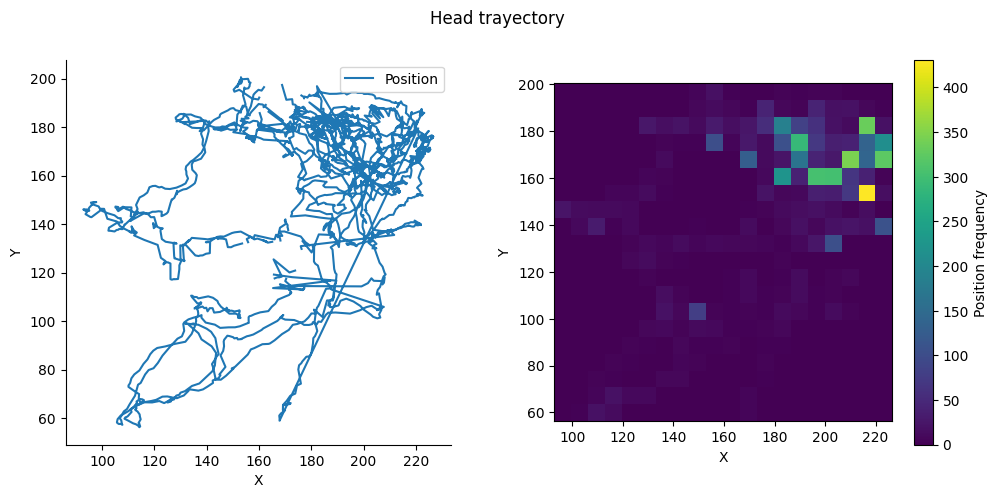

In [ ]:
# Trayectory Figure #

fig = plt.figure(figsize=(12, 5))
fig.suptitle('Head trayectory')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot 1: Trayectory
ax1.plot(x_means, y_means, label='Position')
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot 2: Heatmap
non_nan = ~np.isnan(x_means) & ~np.isnan(y_means)
hist = ax2.hist2d(x_means[non_nan], y_means[non_nan], bins=20)
cbar = fig.colorbar(hist[3], ax=ax2)
cbar.set_label('Position frequency')
ax2.set_box_aspect(1)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

fig.show()

### Interpolate data

To archive continuity in the trayectory, we interpolate remaining NaN data with the NumPy function:
```
np.interpolate()
```



In [ ]:

# Convert to a numpy array
x_interp = np.array(x_means, dtype=float)
y_interp = np.array(y_means, dtype=float)

# Find indices of NaN values
nan_indices = np.isnan(x_interp)

# Interpolate NaN values
x_interp[nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), x_interp[~nan_indices])
y_interp[nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), y_interp[~nan_indices])


In [ ]:
# Interpolated trayectory Figure #

fig = plt.figure(figsize=(12, 5))
fig.suptitle('Head interpolated trayectory')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot 1: Trayectory
ax1.plot(x_interp, y_interp, label='Position')
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot 2: Heatmap
hist = ax2.hist2d(x_interp, y_interp, bins=20)
cbar = fig.colorbar(hist[3], ax=ax2)
cbar.set_label('Position frequency')
ax2.set_box_aspect(1)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

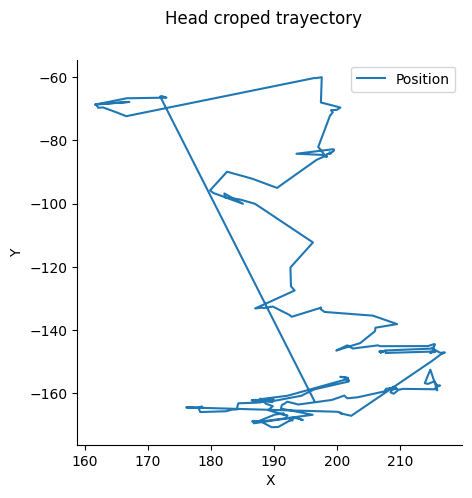

In [ ]:
# Croped trayectory Figure #

fig = plt.figure(figsize=(5, 5))
fig.suptitle('Head croped trayectory')
ax1 = fig.add_subplot(111)

# Plot 1: Trayectory
ax1.plot(x_interp[:500], y_interp[:500], label='Position')
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()


## Speed
Now that we have interpolated data to obtain a continous trayectory, we can compute the mouse **speed**.

In [ ]:
dx = np.diff(x_interp)
dy = np.diff(y_interp)
distance = np.sqrt(dx**2 + dy**2)

time_intervals = x_interp.size - 1
total_time = time_intervals / frame_rate
time = np.linspace(0, total_time, time_intervals)

speed = distance / time

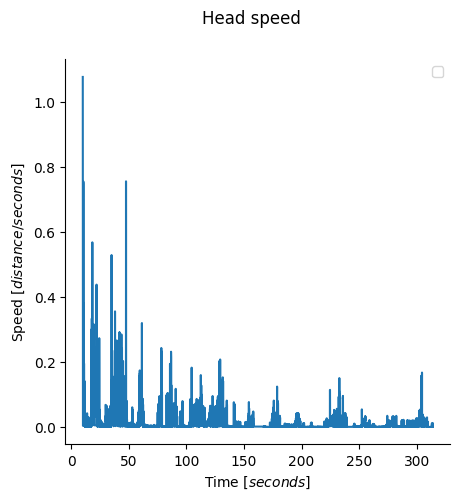

In [ ]:
# Speed Figure #

fig = plt.figure(figsize=(5, 5))
fig.suptitle('Head speed')
ax1 = fig.add_subplot(111)

# Plot 1: Speed
ax1.plot(time[start_frame:], speed[start_frame:])
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('Time [$seconds$]')
ax1.set_ylabel('Speed [$distance/seconds$]')
ax1.legend()

## Aceleration
And the mouse **aceleration**.

In [ ]:
aceleration = np.diff(speed)

In [ ]:
# Aceleration Figure #

fig = plt.figure(figsize=(5, 5))
fig.suptitle('Head acceleration')
ax1 = fig.add_subplot(111)

# Plot: Aceleration
ax1.plot(time[start_frame:-1], aceleration[start_frame:])
ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel('Time [$seconds$]')
ax1.set_ylabel('Aceleration [$distance/seconds^2$]')
ax1.legend()

## Looking direction
To compute where the mouse is **looking** each frame, we can make the normalized sum of the two vectors formed by the nose and each two ears.

First, to avoid NaN values we will interpolate the filtered nose, and ear coordinates.

In [ ]:
filtered_data

In [ ]:
interpolated_data = filtered_data.copy()

# Interpolate right ear
nan_indices = np.isnan(filtered_data['nosex'])
interpolated_data['nosex'][nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), filtered_data['nosex'][~nan_indices])
interpolated_data['nosey'][nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), filtered_data['nosey'][~nan_indices])

# Interpolate left ear
nan_indices = np.isnan(filtered_data['leftearx'])
interpolated_data['leftearx'][nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), filtered_data['leftearx'][~nan_indices])
interpolated_data['lefteary'][nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), filtered_data['lefteary'][~nan_indices])

# Interpolate right ear
nan_indices = np.isnan(filtered_data['rightearx'])
interpolated_data['rightearx'][nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), filtered_data['rightearx'][~nan_indices])
interpolated_data['righteary'][nan_indices] = np.interp(np.flatnonzero(nan_indices), np.flatnonzero(~nan_indices), filtered_data['rightearx'][~nan_indices])

In [ ]:
interpolated_data

Now we can make the normalized sum of vectors and save them into a new table.

In [ ]:
directions_list = []

for n in range(0, interpolated_data['nosex'].size):
  nose_point = np.array([interpolated_data['nosex'][n], interpolated_data['nosey'][n]])
  leftear_point = np.array([interpolated_data['leftearx'][n], interpolated_data['lefteary'][n]])
  rightear_point = np.array([interpolated_data['rightearx'][n], interpolated_data['righteary'][n]])

  v_1 = nose_point - leftear_point
  v_2 = nose_point - rightear_point
  sum_v = v_1 + v_2
  norm_v = sum_v / np.linalg.norm(sum_v)
  directions_list.append(pd.DataFrame(norm_v))

# Convert the list of directions to a NumPy array
directions_array = np.array(directions_list)

# Reshape the array to make it 2D
directions_array = directions_array.reshape(-1, 2)

directions = pd.DataFrame(directions_array, columns=['x', 'y'])
directions


In [ ]:
# Calculate angles from direction vectors
angles = np.arctan2(directions['y'], directions['x']) * (360 / np.pi)

In [ ]:
# Looking directions Figure #

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = plt.subplot(122, polar=True)

# Plot 1: Trayectory looking directions
ax1.plot(x_interp, y_interp, label='Position')
ax1.quiver(x_interp, y_interp, directions['x'], directions['y'], color='r', scale=20)

ax1.set_box_aspect(1)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Trayectory looking directions')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plot 2: Looking direction frecuencies
ax2.hist(np.radians(angles), bins=np.radians(np.arange(0, 360, 10)), edgecolor='black', alpha=0.7)
ax2.set_theta_offset(np.radians(90))
ax2.set_theta_direction(-1)
ax2.set_rlabel_position(0)

ax2.set_title('Looking direction frecuencies (10-degree bins)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

fig.show()

# Real data analysis
---


## Load data

In [170]:
def get_video_paths(data_path: str):
  parts = data_path.split('/')
  folder_path = '/'.join(parts[:-1])
  filename = parts[-1].split('_beh-CROPDLC')[0]
  video_path_top = f'{folder_path}/{filename}_beh-CROP.avi'
  video_path_lateral = f'{folder_path}/{filename}_beh-CROP1.avi'
  return video_path_top, video_path_lateral

def load_paths(dir_path):
  h5_paths_top = []
  h5_paths_lateral = []
  video_paths_top = []
  video_paths_lateral = []
  for dirpath, dirs, files in os.walk(dir_path):
    for filename in fnmatch.filter(files, '*CROPDLC_resnet50_DLC_after_injJan5shuffle1_500000.h5'):
      h5_paths_top.append(os.path.join(dirpath, filename))

  for dirpath, dirs, files in os.walk(dir_path):
    for filename in fnmatch.filter(files, '*CROP1DLC_resnet50_DLC-beh-after-inj-lateralJan7shuffle1_600000.h5'):
      h5_paths_lateral.append(os.path.join(dirpath, filename))

  for path in h5_paths_top:
    video_path_top, video_path_lateral = get_video_paths(path)
    video_paths_top.append(video_path_top)
    video_paths_lateral.append(video_path_lateral)
  return h5_paths_top, h5_paths_lateral, video_paths_top, video_paths_lateral

def load_data(h5_paths_top, h5_paths_lateral):
  data_top = []
  data_lateral = []
  for path in h5_paths_top:
    data_top.append(pd.read_hdf(path, header = [1,2,3]))

  for path in h5_paths_lateral:
    data_lateral.append(pd.read_hdf(path, header = [1,2,3]))

  for data in data_top:
    data.columns = list(data.columns.get_level_values(1) + data.columns.get_level_values(2))

    # Invert Y axis:
    data.loc[:, data.columns[data.columns.str.endswith('y')]] = Y_RESOLUTION - data.loc[:, data.columns[data.columns.str.endswith('y')]]

    # Rotate 90 degrees clockwise:
    labels_to_rotate = ['Nose', 'Head', 'Ear_left', 'Ear_right', 'Neck',
                        'Back_1', 'Back_2', 'Back_3', 'Back_4',
                        'Tail_1', 'Tail_2', 'Tail_3', 'Tail_4']
    for label in labels_to_rotate:
      data = rotate_90_clockwise(data, label)

  for data in data_lateral:
    data.columns = list(data.columns.get_level_values(1) + data.columns.get_level_values(2))

    # Invert Y axis:
    data.loc[:, data.columns[data.columns.str.endswith('y')]] = Y_RESOLUTION - data.loc[:, data.columns[data.columns.str.endswith('y')]]

  return data_top, data_lateral

def rotate_90_clockwise(data, label='') -> pd.DataFrame:
  """
  Rotates all poits from the desired data colum pair (x and y) 90º clockwise to
  align the top view data with the lateral view data.

  Parameters:
  - data (pd.DataFrame): Data to rotate.
  - label (str): Name of the colomns to rotate, without the last 'x' or 'y'.

  Returns:
  - data (pd.DataFrame): Data with the updated rotated column.
  """
  centered_x = data[label + 'x'] - BOX_CENTER['x']
  centered_y = data[label + 'y'] - BOX_CENTER['y']

  coordinates = np.array([centered_x, centered_y])
  rotation_matrix = np.array([[0, 1], [-1, 0]])
  rotated_x, rotated_y = np.dot(rotation_matrix, coordinates)

  data[label + 'x'] = rotated_x + BOX_CENTER['x']
  data[label + 'y'] = rotated_y + BOX_CENTER['y']
  return data


In [171]:
dir_path = '/content/gdrive/MyDrive/SBC-Gonzalo/DATA'
H5_PATHS_TOP, H5_PATHS_LATERAL, VIDEO_PATHS_TOP, VIDEO_PATHS_LATERAL = load_paths(dir_path)

# Y video resolution:
Y_RESOLUTION = 240

# Box coordinates observed from video frames:
BOX_TOP = {'x': [74, 237, 237, 74, 74], 'y': [43, 43, 206, 206, 43]}
BOX_LATERAL = {'x': [24, 310, 258, 94, 24], 'y': [33, 33, 99, 100, 33]}

BOX_CENTER = {'x':(BOX_TOP['x'][0] + BOX_TOP['x'][1]) / 2, 'y':(BOX_TOP['y'][0] + BOX_TOP['y'][3]) / 2}


data_top, data_lateral = load_data(H5_PATHS_TOP, H5_PATHS_LATERAL)


## Trayectory

In [230]:
def filter_data(data: pd.DataFrame, desired_likelihood: float) -> pd.DataFrame:
  """
  Filters video data removing points whose likelihooed is less than desired and
  adding NaN (np.nan) to its values instead.

  Parameters:
  - data (pd.DataFrame): Data to filter.
  - desired_likelihood (float): Min likelihood each valid point should have.

  Returns:
  - filtered_data (pd.DataFrame): Copy of the original data with not likely
    values changed by NaN (np.nan).
  """

  filtered_data = data.copy()

  parts = [
      'Nose', 'Head', 'Ear_left', 'Ear_right', 'Neck',
      'Back_1', 'Back_2', 'Back_3', 'Back_4',
      'Tail_1', 'Tail_2', 'Tail_3', 'Tail_4',
      'Paw_left', 'Paw_right'
  ]

  for part in parts:
      likelihood_column = f'{part}likelihood'

      if likelihood_column in filtered_data.columns:
        x_column = f'{part}x'
        y_column = f'{part}y'

        mask = filtered_data[likelihood_column] < desired_likelihood
        filtered_data.loc[mask, [x_column, y_column]] = np.nan

  return filtered_data

def add_means(filtered_data: pd.DataFrame) -> pd.DataFrame:
  """
  Makes a mean with the valid values from the mouse head and adds the 'Meanx'
  and 'Meany' columns to the pd.DataFrame.
  """
  x_coords = np.array([filtered_data[point] for point in ['Nosex', 'Headx', 'Ear_leftx', 'Ear_rightx', 'Neckx']])
  y_coords = np.array([filtered_data[point] for point in ['Nosey', 'Heady', 'Ear_lefty', 'Ear_righty', 'Necky']])

  x_means = np.nanmean(x_coords, axis=0)
  y_means = np.nanmean(y_coords, axis=0)

  filtered_data = filtered_data.assign(Meanx=x_means)
  filtered_data = filtered_data.assign(Meany=y_means)

  return filtered_data

def interpolate_data(filtered_data: pd.DataFrame) -> pd.DataFrame:
  """
  Interpolates NaN (np.nan) values.
  """

  interpolated_data = filtered_data.copy()

  parts = [
      'Nose', 'Head', 'Ear_left', 'Ear_right', 'Neck',
      'Back_1', 'Back_2', 'Back_3', 'Back_4',
      'Tail_1', 'Tail_2', 'Tail_3', 'Tail_4',
      'Paw_left', 'Paw_right', 'Mean'
  ]

  for part in parts:
    x_column = f'{part}x'
    y_column = f'{part}y'

    if x_column in interpolated_data.columns:
      x_coords = np.array(filtered_data[x_column], dtype=float)
      y_coords = np.array(filtered_data[y_column], dtype=float)

      # Find indices of NaN values
      nan_indices_x = np.isnan(x_coords)
      nan_indices_y = np.isnan(y_coords)

      non_nan_indices = np.arange(len(x_coords))

      # Interpolate NaN values
      if not non_nan_indices[~nan_indices_x].size == 0:
        x_coords[nan_indices_x] = np.interp(non_nan_indices[nan_indices_x], non_nan_indices[~nan_indices_x], x_coords[~nan_indices_x])
        y_coords[nan_indices_y] = np.interp(non_nan_indices[nan_indices_y], non_nan_indices[~nan_indices_y], y_coords[~nan_indices_y])

      interpolated_data[x_column] = x_coords
      interpolated_data[y_column] = y_coords

  return interpolated_data

def filter_and_interpolate(data, desired_likelihood):
  filtered_data = []
  interpolated_data = []

  for data_frame in data:
    filtered_data_frame = filter_data(data_frame, desired_likelihood)
    filtered_data_frame = add_means(filtered_data_frame)
    filtered_data.append(filtered_data_frame)

    interpolated_data_frame = interpolate_data(filtered_data_frame)
    interpolated_data.append(interpolated_data_frame)

  return filtered_data, interpolated_data

In [117]:
def figure_likelihood(likelihood):
  fig = plt.figure(figsize=(5, 5))
  fig.suptitle(likelihood)

  ax1 = fig.add_subplot(111)
  ax1.hist(data[likelihood], bins=100)
  ax1.set_box_aspect(1)
  ax1.spines[['right', 'top']].set_visible(False)
  ax1.set_xlabel('Likelihood')
  ax1.set_ylabel('Frecuency')

  fig.show()

def figure_interpolated_trayectory(interpolated_data, label, format=0):
  x = interpolated_data['Meanx']
  y = interpolated_data['Meany']
  # Interpolated trayectory Figure #
  fig = plt.figure(figsize=(12, 5))
  fig.suptitle(label)
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  # Plot 1: Trayectory
  ax1.plot(x, y, label='Position')
  if format == 0:
    ax1.plot(BOX_TOP['x'], BOX_TOP['y'], label='Box')
  elif format == 1:
    ax1.plot(BOX_LATERAL['x'], BOX_LATERAL['y'], label='Box')
  ax1.set_box_aspect(1)
  ax1.spines[['right', 'top']].set_visible(False)
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.legend()

  # Plot 2: Heatmap
  hist = ax2.hist2d(x, y, bins=20)
  cbar = fig.colorbar(hist[3], ax=ax2)
  cbar.set_label('Position frequency')
  ax2.set_box_aspect(1)
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')

def figure_all_trayectories(filtered_data, interpolated_data, format=0):
  # Interpolated trayectory Figure #
  fig = plt.figure(figsize=(12, 5))
  fig.suptitle('All trayecories at once')
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  # Plot 1: All trayectories
  for index, data in enumerate(interpolated_data):
    ax1.plot(data['Meanx'], data['Meany'])

  if format == 0:
    ax1.plot(BOX_TOP['x'], BOX_TOP['y'], label='Box')
  elif format == 1:
    ax1.plot(BOX_LATERAL['x'], BOX_LATERAL['y'], label='Box')

  ax1.set_box_aspect(1)
  ax1.spines[['right', 'top']].set_visible(False)
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.set_title('Interpolated trajectories')
  ax1.legend()

  # Plot 2: All trayectories no interpolation
  for data in filtered_data:
    ax2.plot(data['Meanx'], data['Meany'])

  if format == 0:
    ax2.plot(BOX_TOP['x'], BOX_TOP['y'], label='Box')
  elif format == 1:
    ax2.plot(BOX_LATERAL['x'], BOX_LATERAL['y'], label='Box')

  ax2.set_box_aspect(1)
  ax2.spines[['right', 'top']].set_visible(False)
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  ax2.set_title('Trajectories without interpolation')
  ax2.legend()


In [ ]:
DESIRED_LIKELIHOOD = 0.95
filtered_data_top, interpolated_data_top = filter_and_interpolate(data_top, DESIRED_LIKELIHOOD)
filtered_data_lateral, interpolated_data_lateral = filter_and_interpolate(data_lateral, DESIRED_LIKELIHOOD)

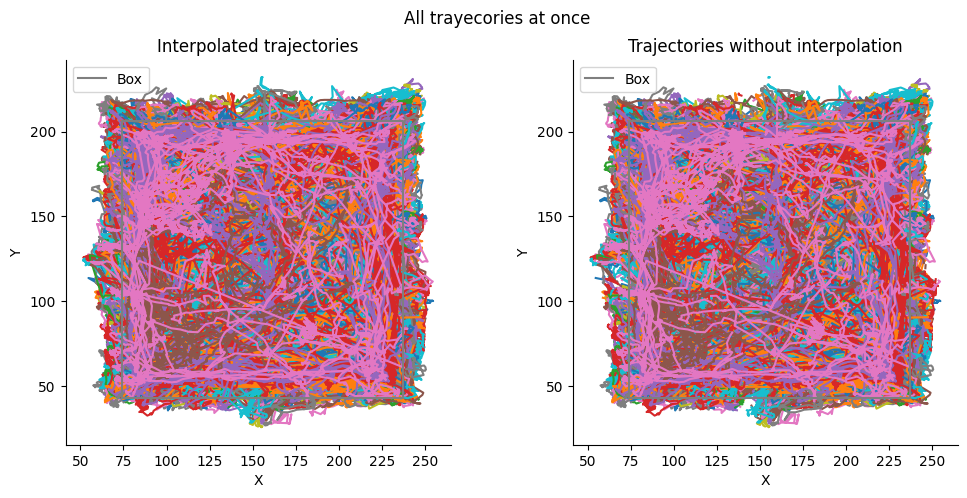

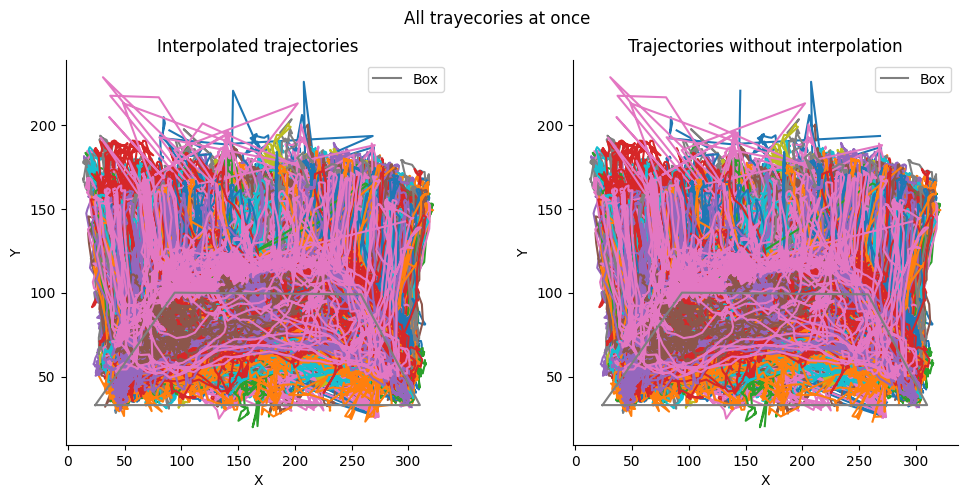

In [129]:
figure_all_trayectories(filtered_data_top, interpolated_data_top, format=0)
figure_all_trayectories(filtered_data_lateral, interpolated_data_lateral, format=1)

## Rearing
The mouse will put its weight on its hind legs, raise, it's forelimbs from the ground, and extend it's head upwards.

VARS:
- ``Steady location (position)``
- ``Altitude change	(height)``
- ``Head stretching	(head triangulation, angles)``
- ``Next to the wall (position, ROIs)``

Once the data is filtered, we can use the interpolated head's mean to check if the mouse is rearing by looking where the trayectory goes out of the box limits.

In [164]:
def get_frame_at_time(video_path, minute, second):
  # Open the video file
  cap = cv2.VideoCapture(video_path)

  # Calculate the frame position based on time
  frame_position = int((minute * 60 + second) * cap.get(cv2.CAP_PROP_FPS))

  # Set the frame position
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_position)

  # Read the frame at the specified time
  ret, frame = cap.read()

  # Release the video capture object
  cap.release()

  return frame

def get_frame(video_path, frame):
  # Open the video file
  cap = cv2.VideoCapture(video_path)

  # Set the frame position
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame)

  # Read the frame at the specified time
  ret, frame = cap.read()

  # Release the video capture object
  cap.release()

  return frame

def check_rearing(data: pd.DataFrame, frame_rate: int, min_frames_int: int):
  """
  Gets time intervals where the mouse is rearing.

  Parameters:
  - data (pd.DataFrame): Filtered and interpolated mouse video data file.
  - frame_rate (int): Video's frames per second.
  - min_frames_int (int): Minimun number of frames a time interval should have.

  Returns:
  - rearing_intervals (List[Tuple[str, str]]): Time intervals where the mouse is
    rearing in the format 'minutes:seconds'.
  """

  # Check frames where trayectory goes out of the box limits.
  out_of_box_frames = set()
  for index, x in enumerate(data['Meanx']):
    if x < BOX_TOP['x'][0] or x > BOX_TOP['x'][1]:
      out_of_box_frames.add(index)

  for index, y in enumerate(data['Meany']):
    if y < BOX_TOP['y'][0] or y > BOX_TOP['y'][3]:
      out_of_box_frames.add(index)

  # Group frames into intervals:
  rearing_intervals = []
  start_frame = 0
  last_frame = 0
  out_of_box_frames = list(out_of_box_frames)
  out_of_box_frames.sort()
  for frame in out_of_box_frames:
    if frame != last_frame + 1:
      rearing_intervals.append((start_frame, last_frame))
      start_frame = frame
      last_frame = frame
    else:
      last_frame = frame

  # Pass the frames to minutes and seconds and filter lenght
  # Format: ('0:00', '0:00')
  formated_intervals = [
      (f'{start // frame_rate // 60:1}:{start // frame_rate % 60:02}',
      f'{end // frame_rate // 60:1}:{end // frame_rate % 60:02}')
      for start, end in rearing_intervals if end - start > min_frames_int
  ]

  # Format: (0, 00)
  rearing_frames = [
      ((start + end)/2 // frame_rate // 60, (start + end)/2 / frame_rate % 60)
      for start, end in rearing_intervals if end - start > min_frames_int
  ]

  return rearing_frames


In [184]:
def figure_rearing_frames(data_top, video_number:int, frame_rate: int, min_frames_int: int):
  rearing_frames = check_rearing(data_top[video_number], frame_rate, min_frames_int)

  fig = plt.figure(figsize=(12, 5*len(rearing_frames)))

  i = 0
  for minute, second in rearing_frames:
    i += 1
    frame = get_frame_at_time(VIDEO_PATHS_TOP[video_number], minute, second)
    ax1 = fig.add_subplot(len(rearing_frames), 2, i)
    rotated_frame_top = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
    ax1.imshow(cv2.cvtColor(rotated_frame_top, cv2.COLOR_BGR2RGB))
    ax1.set_title('Frame {}:{:05.2f}s'.format(int(minute), second))
    ax1.axis('off')
    i += 1
    frame = get_frame_at_time(VIDEO_PATHS_LATERAL[video_number], minute, second)
    ax2 = fig.add_subplot(len(rearing_frames), 2, i)
    ax2.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax2.axis('off')

  plt.tight_layout()
  fig.show()

In [ ]:
video_number = 75
figure_interpolated_trayectory(interpolated_data_top[video_number], 'Top interpolated trayectory', format=0)
figure_interpolated_trayectory(interpolated_data_lateral[video_number], 'Side interpolated trayectory', format=1)
figure_rearing_frames(interpolated_data_top, video_number, 20, 5)

## Body triangulations

In [211]:
def triangulate(data, frame):
  x = []
  y = []
  parts = [
        'Nose', 'Head', 'Ear_left', 'Ear_right', 'Neck',
        'Back_1', 'Back_2', 'Back_3', 'Back_4',
        'Tail_1', 'Tail_2', 'Tail_3', 'Tail_4']
  for part in parts:
   x.append(data[f'{part}x'][frame])
   y.append(data[f'{part}y'][frame])

  triangles = np.array([
    [0, 1, 2],
    [0, 1, 3],
    [2, 3, 1],
    [2, 3, 4],
    [2, 3, 8]
  ])
  triangulation = tri.Triangulation(x, y, triangles)

  return x, y, triangulation

def triangulate_lateral(data, frame):
  x = []
  y = []
  parts = [
        'Nose', 'Head', 'Ear_left', 'Ear_right', 'Neck',
        'Back_1', 'Back_2', 'Back_3', 'Back_4',
        'Tail_1', 'Tail_2', 'Tail_3', 'Tail_4',
        'Paw_left', 'Paw_right']
  for part in parts:
   x.append(data[f'{part}x'][frame])
   y.append(data[f'{part}y'][frame])

  triangles = np.array([
    [0, 1, 2],
    [0, 1, 3],
    [2, 3, 1],
    [2, 3, 4],
    [2, 3, 8]
  ])
  triangulation = tri.Triangulation(x, y, triangles)

  return x, y, triangulation

def figure_triangulations_trayectory(data_top, data_lateral):
  fig = plt.figure(figsize=(12, 5))
  fig.suptitle('Triangulation')

  # Plot 1
  ax1 = fig.add_subplot(121)
  for frame in range(1, 5000, 500):
    x, y, triangulation = triangulate(data_top, frame)
    alpha = frame / 5000.0
    ax1.triplot(triangulation, '.--', alpha=alpha)
  ax1.plot(BOX_TOP['x'], BOX_TOP['y'], label='Box')
  ax1.set_box_aspect(1)
  ax1.spines[['right', 'top']].set_visible(False)
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.legend()

  # Plot 2
  ax2 = fig.add_subplot(122)
  for frame in range(1, 5000, 500):
    x, y, triangulation = triangulate(data_lateral, frame)
    alpha = frame / 5000.0
    ax2.triplot(triangulation, '.--', alpha=alpha)
  ax2.plot(BOX_LATERAL['x'], BOX_LATERAL['y'], label='Box')
  ax2.set_box_aspect(1)
  ax2.spines[['right', 'top']].set_visible(False)
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  ax2.legend()


In [ ]:
video = 5
figure_triangulations_trayectory(interpolated_data_top[video], interpolated_data_lateral[video])

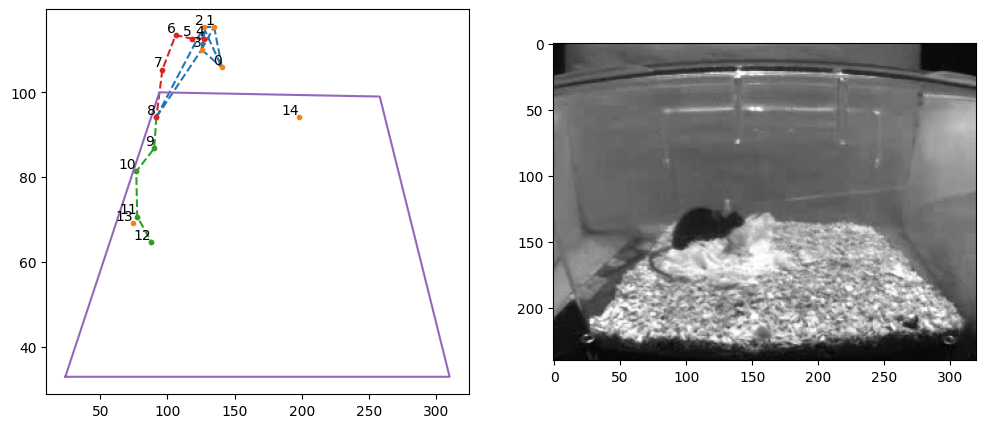

In [239]:
def figure_triangulation_frame_top(data, video, frame):
  data_frame = data[video]
  frame_img = get_frame(VIDEO_PATHS_TOP[video], frame)
  x, y, triangulation = triangulate(data_frame, frame)

  # Invert frame image
  #frame_img = frame_img[::-1, :, :]

  # Rotate the frame image with the box center rotation center
  #center = (BOX_CENTER['x'], BOX_CENTER['y'])  # Center of rotation
  #angle = -90  # Rotation angle (clockwise)
  #rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
  #frame_img = cv2.warpAffine(frame_img, rotation_matrix, (frame_img.shape[1], frame_img.shape[0]))

  frame_img = cv2.rotate(frame_img, cv2.ROTATE_90_CLOCKWISE)

  fig = plt.figure(figsize=(12, 5))
  ax1 = fig.add_subplot(121)
  ax1.triplot(triangulation, '.--')
  #for i, txt in enumerate(range(len(x))):
  #    ax1.text(x[i], y[i], f'{txt}', ha='right', va='bottom')
  ax1.plot(x[8:], y[8:], '.--')
  ax1.plot(x[4:9], y[4:9], '.--')
  ax1.plot(BOX_TOP['x'], BOX_TOP['y'])

  ax2 = fig.add_subplot(122)
  ax2.imshow(cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB))

  fig.show()

def figure_triangulation_frame_lateral(data, video, frame):
  data_frame = data[video]
  frame_img = get_frame(VIDEO_PATHS_LATERAL[video], frame)
  x, y, triangulation = triangulate_lateral(data_frame, frame)
  fig = plt.figure(figsize=(12, 5))
  ax1 = fig.add_subplot(121)
  ax1.triplot(triangulation, '.--')

  for i, txt in enumerate(range(len(x))):
    ax1.text(x[i], y[i], f'{txt}', ha='right', va='bottom')

  ax1.plot(x[8:13], y[8:13], '.--')
  ax1.plot(x[4:9], y[4:9], '.--')
  ax1.plot(BOX_LATERAL['x'], BOX_LATERAL['y'])

  ax2 = fig.add_subplot(122)
  ax2.imshow(cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB))

  fig.show()

#figure_triangulation_frame_top(interpolated_data_top, 5, 1000)
figure_triangulation_frame_lateral(interpolated_data_lateral, 8, 1500)